In [1]:
import tensorflow as tf

/Users/william/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
tf.__version__

'1.4.1'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.1.2'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [6]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train origin shape", X_train.shape)
print("Y_train origin shape", y_train.shape)

11493376/11490434 [==============================] - 31s 3us/step
X_train origin shape (60000, 28, 28)
Y_train origin shape (60000,)


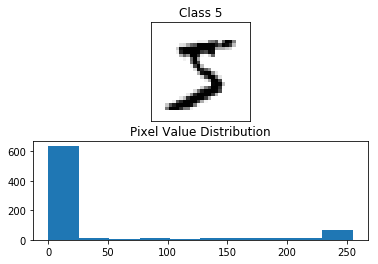

In [7]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='binary', interpolation=None)
plt.title("Class {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

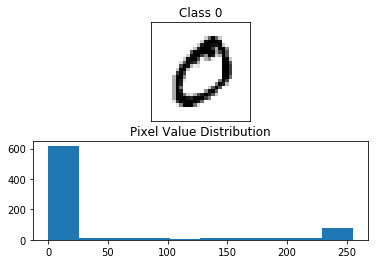

In [8]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[1], cmap='binary', interpolation=None)
plt.title("Class {}".format(y_train[1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[1].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [9]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [10]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Train matrix shape",X_train.shape)
print("Test matrix shape",X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [11]:
n_classes = 10
print("Shape before one-hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding: ",Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [12]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
model = Sequential()
model.add(Dense(256,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,Y_train,
                   batch_size=128, epochs=8,
                   verbose=2,
                   validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 6s - loss: 0.3491 - acc: 0.8940 - val_loss: 0.1322 - val_acc: 0.9587
Epoch 2/8
 - 4s - loss: 0.1495 - acc: 0.9546 - val_loss: 0.0971 - val_acc: 0.9694
Epoch 3/8
 - 4s - loss: 0.1108 - acc: 0.9667 - val_loss: 0.0857 - val_acc: 0.9741
Epoch 4/8
 - 4s - loss: 0.0920 - acc: 0.9712 - val_loss: 0.0664 - val_acc: 0.9787
Epoch 5/8
 - 4s - loss: 0.0775 - acc: 0.9759 - val_loss: 0.0703 - val_acc: 0.9788
Epoch 6/8
 - 4s - loss: 0.0672 - acc: 0.9783 - val_loss: 0.0710 - val_acc: 0.9775
Epoch 7/8
 - 4s - loss: 0.0615 - acc: 0.9804 - val_loss: 0.0614 - val_acc: 0.9814
Epoch 8/8
 - 4s - loss: 0.0532 - acc: 0.9828 - val_loss: 0.0701 - val_acc: 0.9797


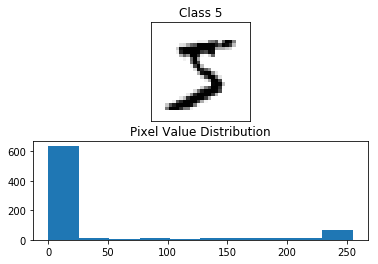

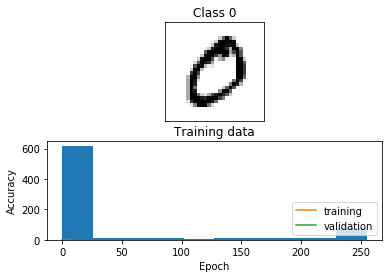

In [20]:
plt.subplot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'],loc='lower right')
plt.show()